<a href="https://colab.research.google.com/github/adasegroup/ML2022_seminars/blob/master/seminar7/seminar_GB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA and Data preprocessing for "Give me some credit" data


In [ ]:
rand_state = 123

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/adasegroup/ML2022_seminars/master/seminar5/give_me_some_credit.csv', index_col=0)

In [ ]:
df_kaggle_test = pd.read_csv('https://raw.githubusercontent.com/Astralex98/Give-me-some-credit-Kaggle-/main/cs-test.csv', index_col=0)

In [ ]:
df_kaggle_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101503 entries, 1 to 101503
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      0 non-null       float64
 1   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 2   age                                   101503 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 4   DebtRatio                             101503 non-null  float64
 5   MonthlyIncome                         81400 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 7   NumberOfTimes90DaysLate               101503 non-null  int64  
 8   NumberRealEstateLoansOrLines          101503 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 10  NumberOfDependents                    98877 non-null   float64
dtype

In [ ]:
# There are no any labels in test, so we just remove this column
df_kaggle_test = df_kaggle_test.drop(['SeriousDlqin2yrs'], axis=1)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [ ]:
# Check for imbalance
df_train['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

**Summary of quick EDA:**

1. There are some missing values

2. Our classification task is highly imbalanced

Let's look at feature values in more details

#### RevolvingUtilizationOfUnsecuredLines

Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits

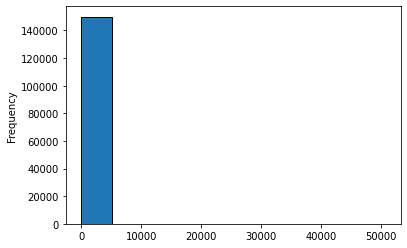

In [ ]:
df_train['RevolvingUtilizationOfUnsecuredLines'].plot(kind='hist', edgecolor='black')

In [ ]:
df_train['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

**MY COMMENT:**

Actually, I don't understand what is the meaning of this feature. But from the plot I can see that there too much right-skewed outliers.

#### Age

Age of borrower in years

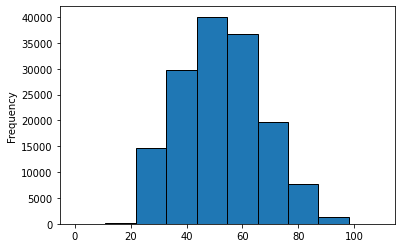

In [ ]:
df_train['age'].plot(kind='hist', edgecolor='black')

In [ ]:
df_train['age'].describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

**MY COMMENT:**

This distribution seems for me as OK. 

#### NumberOfTime30-59DaysPastDueNotWorse

Number of times borrower has been 30-59 days past due but no worse in the last 2 years.

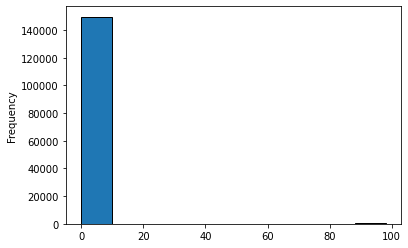

In [ ]:
df_train['NumberOfTime30-59DaysPastDueNotWorse'].plot(kind='hist', edgecolor='black')

In [ ]:
df_train['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [ ]:
df_train['NumberOfTime30-59DaysPastDueNotWorse'].describe()

count    150000.000000
mean          0.421033
std           4.192781
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: float64

**MY COMMENT:**

We can see that values, which are equal to 96 and 98, are wrong. IMHO, we should just remove them. 

#### DebtRatio

Monthly debt payments, alimony,living costs divided by monthy gross income

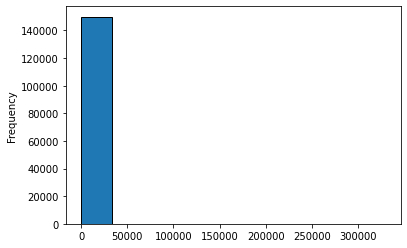

In [ ]:
df_train['DebtRatio'].plot(kind='hist', edgecolor='black')

In [ ]:
df_train['DebtRatio'].value_counts()

0.000000    4113
1.000000     229
4.000000     174
2.000000     170
3.000000     162
            ... 
0.368763       1
0.108009       1
0.441337       1
1.006015       1
0.249908       1
Name: DebtRatio, Length: 114194, dtype: int64

In [ ]:
df_train['DebtRatio'].describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

**MY COMMENT:**

It seems like DebtRation has many right-skewed outliers.

#### Monthly income

Monthly income

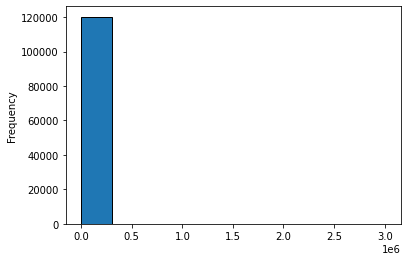

In [ ]:
df_train['MonthlyIncome'].plot(kind='hist', edgecolor='black')

In [ ]:
df_train['MonthlyIncome'].value_counts()

5000.0     2757
4000.0     2106
6000.0     1934
3000.0     1758
0.0        1634
           ... 
16084.0       1
10523.0       1
55250.0       1
9242.0        1
7647.0        1
Name: MonthlyIncome, Length: 13594, dtype: int64

In [ ]:
df_train['MonthlyIncome'].describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

#### NumberOfOpenCreditLinesAndLoans

Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)

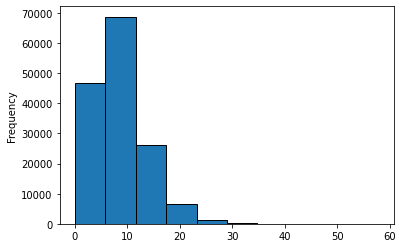

In [ ]:
df_train['NumberOfOpenCreditLinesAndLoans'].plot(kind='hist', edgecolor='black')

In [ ]:
df_train['NumberOfOpenCreditLinesAndLoans'].value_counts()

6     13614
7     13245
5     12931
8     12562
4     11609
9     11355
10     9624
3      9058
11     8321
12     7005
2      6666
13     5667
14     4546
1      4438
15     3645
16     3000
17     2370
0      1888
18     1874
19     1433
20     1169
21      864
22      685
23      533
24      422
25      337
26      239
27      194
28      150
29      114
30       88
31       74
32       52
33       47
34       35
35       27
36       18
38       13
40       10
39        9
42        8
45        8
43        8
37        7
48        6
49        4
54        4
41        4
52        3
46        3
57        2
51        2
56        2
47        2
50        2
44        2
58        1
53        1
Name: NumberOfOpenCreditLinesAndLoans, dtype: int64

In [ ]:
df_train['NumberOfOpenCreditLinesAndLoans'].describe()

count    150000.000000
mean          8.452760
std           5.145951
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

#### NumberOfTimes90DaysLate

Number of times borrower has been 90 days or more past due.

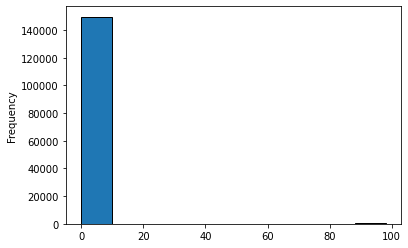

In [ ]:
df_train['NumberOfTimes90DaysLate'].plot(kind='hist', edgecolor='black')

In [ ]:
df_train['NumberOfTimes90DaysLate'].value_counts()

0     141662
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
96         5
11         5
13         4
15         2
14         2
12         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

In [ ]:
df_train['NumberOfTimes90DaysLate'].describe()

count    150000.000000
mean          0.265973
std           4.169304
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTimes90DaysLate, dtype: float64

#### NumberRealEstateLoansOrLines

Number of mortgage and real estate loans including home equity lines of credit

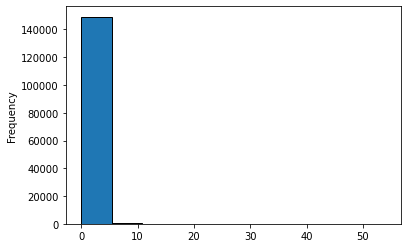

In [ ]:
df_train['NumberRealEstateLoansOrLines'].plot(kind='hist', edgecolor='black')

In [ ]:
df_train['NumberRealEstateLoansOrLines'].value_counts()

0     56188
1     52338
2     31522
3      6300
4      2170
5       689
6       320
7       171
8        93
9        78
10       37
11       23
12       18
13       15
15        7
14        7
17        4
16        4
25        3
18        2
23        2
19        2
20        2
26        1
54        1
21        1
29        1
32        1
Name: NumberRealEstateLoansOrLines, dtype: int64

In [ ]:
df_train['NumberRealEstateLoansOrLines'].describe()

count    150000.000000
mean          1.018240
std           1.129771
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          54.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

#### NumberOfTime60-89DaysPastDueNotWorse

Number of times borrower has been 60-89 days past due but no worse in the last 2 years.

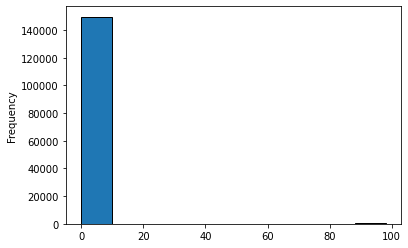

In [ ]:
df_train['NumberOfTime60-89DaysPastDueNotWorse'].plot(kind='hist', edgecolor='black')

In [ ]:
df_train['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

0     142396
1       5731
2       1118
3        318
98       264
4        105
5         34
6         16
7          9
96         5
8          2
11         1
9          1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [ ]:
df_train['NumberOfTime60-89DaysPastDueNotWorse'].describe()

count    150000.000000
mean          0.240387
std           4.155179
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: float64

#### NumberOfDependents

Number of dependents in family excluding themselves (spouse, children etc.)

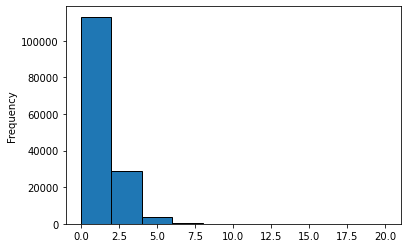

In [ ]:
df_train['NumberOfDependents'].plot(kind='hist', edgecolor='black')

In [ ]:
df_train['NumberOfDependents'].value_counts()

0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: NumberOfDependents, dtype: int64

In [ ]:
df_train['NumberOfDependents'].describe()

count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

### Outlier analysis

<img src = 'https://i0.wp.com/neptune.ai/wp-content/uploads/2022/10/Outlier-treatment.png?ssl=1' width="600"/>

In [ ]:
class IQROutlierAnalizer:

  def __init__(self, df):

    # Initial dataframe
    # We just drop NaNs to count low and upper bounds
    self.df = df.dropna()

    # List of pairs (low_bound, upper_bound) for each feature
    self.bounds = []

  def get_bounds(self):

    # Overall number of features
    features = self.df.columns

    # Iterating over all features and collect low and upper bounds
    for i in features:
      iqr = np.subtract(*np.percentile(self.df[i],[75,25]))
      low_bound = np.percentile(self.df[i],25) - 1.5*iqr
      upper_bound = np.percentile(self.df[i],75) + 1.5*iqr
      self.bounds.append((low_bound, upper_bound))
    
    return self.bounds
  
  def remove_noise_features(self):
    
    # Find low and upper bounds for each feature
    bounds = self.get_bounds()

    # Overall number of features
    features = list(self.df.columns)

    # Iterating over all features and collect low and upper bounds
    for i in range(len(features)):
      low_bound, upper_bound  = bounds[i]
      self.df = self.df[(self.df[features[i]] >= low_bound) & (self.df[features[i]] <= upper_bound)]
      print("df shape: {}".format(self.df.shape))
    
    return self.df

In [ ]:
# Drop labels to explore analysis of the features
df_1 = df_train.drop(['SeriousDlqin2yrs'], axis=1)

In [ ]:
outlier_analizer = IQROutlierAnalizer(df_1)

In [ ]:
outlier_analizer.get_bounds()

[(-0.7814318415, 1.3959437065),
 (8.5, 92.5),
 (0.0, 0.0),
 (-0.3653701365, 0.9913171715),
 (-3873.5, 15522.5),
 (-4.0, 20.0),
 (0.0, 0.0),
 (-3.0, 5.0),
 (0.0, 0.0),
 (-3.0, 5.0)]

We can see that features

- **NumberOfTime30-59DaysPastDueNotWorse**

- **NumberOfTimes90DaysLate**

- **NumberOfTime60-89DaysPastDueNotWorse**

have strange low and up bounds. We should deal with them separately.

### Missing values

Since random forests can't deal with NaNs, we should somehow deal with them. About strategies for dealing with missing values:https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e 

We can see, that features **MonthlyIncome**(20%) and **NumberOfDependents** (3%) have some missing values. From our intuition we can understand that **MonthlyIncome** is highly important feature for our task. Consequently, dropping those data-points could be a not a good idea. Now, for the sake of simplicity, we can just impute NaNs with means of corresponding features.

In [ ]:
# Method to preprocess data
def df_remove_nans(df):

  # Deal with NaNs
  df["MonthlyIncome"] = df["MonthlyIncome"].replace(np.NaN,  df["MonthlyIncome"].mean())
  df["NumberOfDependents"] = df["NumberOfDependents"].replace(np.NaN,  df["NumberOfDependents"].mean())

  # small check for NaNs
  if ((df["MonthlyIncome"].isnull().values.any() == True) or (df["NumberOfDependents"].isnull().values.any())):
    print("There are some NaNs here!")
    return None
  
  return df

### Scaling

### Class imbalance

We deal with it in part 2 - "Dividing data into train and test"

In [ ]:
# remove nans data
df_train = df_remove_nans(df_train)
X_kaggle_test = df_remove_nans(df_kaggle_test)